In [25]:
import pandas as pd
import numpy as np
from matplotlib import  pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler    
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

data1 = pd.read_csv("/Users/manancy/Downloads/Nancy 2/工作/Carlo /尝试的业务/RisklabDataCompetition/1 Credit Card Debt Crisis/2nd/Cleaned data-Nancy(before sub-sample).csv")
dataN = pd.read_csv("/Users/manancy/Downloads/Nancy 2/工作/Carlo /尝试的业务/RisklabDataCompetition/1 Credit Card Debt Crisis/2nd/Cleaned Sub-sample-Nancy.csv")

In [26]:
# Original
X=data1.drop(columns="July_Payment_Status")
y=data1["July_Payment_Status"]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=30)

# Sub-sample
Xn=dataN.drop(columns="July_Payment_Status")
yn=dataN["July_Payment_Status"]
XtrainN, XtestN, YtrainN, YtestN = train_test_split(Xn, yn, test_size=0.3, random_state=30)

In [27]:
#data1.drop(columns="July_Payment_Status")

In [28]:
# Original
from sklearn.model_selection import RandomizedSearchCV
from random import choice
LR=LogisticRegression(penalty="l2", solver="liblinear", C=0.8, max_iter=100)
LR1= LR.fit(Xtrain,Ytrain)
y_pred=LR1.predict(Xtest)
LR1.score(Xtest,Ytest)

0.7912986588158325

In [29]:
# Sub-sample
LRn=LogisticRegression(penalty="l2", solver="liblinear", C=0.8, max_iter=100)
LR1n= LR.fit(XtrainN,YtrainN)
yn_pred=LR1.predict(XtestN)
LR1n.score(XtestN,YtestN)

0.6656166707051127

In [30]:
from sklearn.model_selection import GridSearchCV
parameters = {"penalty":("l1","l2"),
              "C":np.linspace(0,1,10),
              "solver":("newton-cg","lbfgs","liblinear","sag","saga","warn")}
LR2=LogisticRegression()

In [31]:
import warnings
warnings.filterwarnings('ignore')
GS = GridSearchCV(LR1, parameters, cv=10)
GS.fit(Xtrain,Ytrain)

GridSearchCV(cv=10, estimator=LogisticRegression(C=0.8, solver='liblinear'),
             param_grid={'C': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'penalty': ('l1', 'l2'),
                         'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga', 'warn')})

In [32]:
print(GS.best_params_)
print(GS.best_score_)

{'C': 0.2222222222222222, 'penalty': 'l2', 'solver': 'liblinear'}
0.7964392261210366


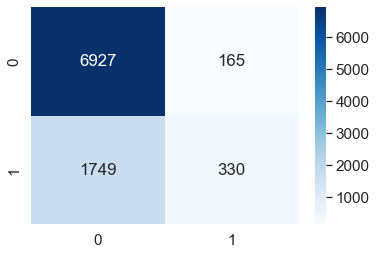

In [33]:
cm = confusion_matrix(Ytest, y_pred)
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt="d",cmap = "Blues")
plt.show()

In [34]:
print(classification_report(Ytest, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.798409  0.976734  0.878615      7092
           1   0.666667  0.158730  0.256410      2079

    accuracy                       0.791299      9171
   macro avg   0.732538  0.567732  0.567513      9171
weighted avg   0.768544  0.791299  0.737566      9171

